In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [42]:
tstat_array = pd.read_csv("../Mutation_regression/OLS_tissue_controlled_regressionTstats_noMCF7.csv", index_col = "Unnamed: 0")

In [43]:
tstat_array

,T_A1CF,T_ABI1,T_ABL1,T_ABL2,T_ACSL3,T_ACSL6,T_ACVR1,T_ACVR2A,T_AFF1,T_AFF3,...,T_ZMYM3,T_ZNF331,T_ZNF384,T_ZNF429,T_ZNF479,T_ZNF521,T_ZNRF3,T_ZRSR2,T_STK11.1,T_KEAP1.1
1,0.512,-1.411,0.820,0.965,1.062,0.819,1.636,0.406,2.722,-0.033,...,0.709,0.146,-0.380,-0.068,2.859,-1.630,1.854,0.363,-0.696,-0.119
2,-0.717,0.131,-0.478,-0.526,-1.938,-1.302,0.695,0.664,-2.435,1.229,...,-0.598,-1.078,0.378,-0.007,0.488,0.858,-0.352,-0.813,0.320,-0.878
3,4.089,-1.856,2.502,2.380,0.433,0.437,1.715,0.913,1.878,0.053,...,1.354,-1.655,0.865,0.899,1.003,3.796,3.286,2.629,-0.280,2.450
4,2.491,-1.549,1.566,0.412,1.760,-0.144,0.205,0.515,3.425,0.119,...,0.903,-0.927,0.194,0.948,1.234,0.376,1.619,1.253,-0.132,0.753
5,1.690,-1.875,-1.367,-0.445,0.498,-3.144,3.060,-1.079,2.092,-0.496,...,0.426,-0.249,-0.382,0.765,0.269,-1.725,0.790,-0.955,0.464,1.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.478,-0.983,2.628,-0.130,2.124,3.727,-1.970,-0.691,-2.864,-1.769,...,-1.567,1.667,0.374,4.238,1.901,-2.139,-0.182,-0.500,5.101,-1.182
1096,3.084,-3.491,-0.026,0.319,-1.155,2.897,-3.322,-3.216,-2.406,-2.742,...,-1.524,4.066,-0.121,-0.538,-1.456,-2.254,-0.281,0.011,-1.999,-1.700
1097,-1.422,-1.013,-1.836,8.034,-2.382,-3.233,2.700,0.218,1.093,-0.351,...,-2.770,7.673,-2.782,-0.686,1.912,-1.992,-1.927,-1.477,6.480,7.699
1098,0.493,-0.783,1.186,1.395,2.422,2.337,-3.228,-2.723,-1.300,-0.236,...,-2.038,2.777,1.432,7.701,-0.390,3.943,2.689,-1.609,1.319,0.862


In [44]:
differential_array = pd.read_csv("../Volcano_plots/Differential_expression_mutations.csv", index_col = "ionIdx")

In [45]:
differential_array

,A1CF,ABI1,ABL1,ABL2,ACSL3,ACSL6,ACVR1,ACVR2A,AFF1,AFF3,...,ZFHX3,ZMYM2,ZMYM3,ZNF331,ZNF384,ZNF429,ZNF479,ZNF521,ZNRF3,ZRSR2
ionIdx,,,,,,,,,,,,,,,,,,,,,
1,-0.006672,0.006577,-0.016414,-0.013945,-0.048314,-0.009305,-0.025435,-0.010030,-0.036586,-0.004064,...,0.010967,0.014868,-0.015292,-0.006350,0.015403,-0.002459,-0.034195,0.020043,-0.039670,-0.021291
2,0.012898,-0.040020,0.008421,-0.017743,0.151952,-0.009463,-0.013327,-0.089152,0.020822,-0.043243,...,-0.035264,-0.108724,0.033758,-0.028069,-0.060242,-0.061957,-0.033663,-0.016443,0.078814,0.054568
3,-0.062972,0.006525,-0.059576,-0.039331,-0.039254,-0.009487,-0.036860,-0.056206,-0.040227,-0.003191,...,-0.031363,-0.036101,-0.046040,0.020901,-0.080430,-0.054486,-0.008816,-0.083023,-0.084690,-0.152692
4,-0.037395,0.025295,-0.034098,-0.006238,-0.113350,0.015192,0.002045,-0.009332,-0.046090,0.005418,...,-0.014992,-0.046107,-0.026935,0.021210,-0.036228,-0.020011,-0.007033,-0.007317,-0.049259,-0.069382
5,-0.012385,0.019338,0.073740,0.013561,-0.044159,0.077822,-0.078024,0.021424,-0.044237,0.002484,...,0.040799,0.056307,0.000869,-0.007309,0.017314,-0.010230,-0.018983,0.014090,0.007444,0.081512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.019717,-0.003672,-0.056376,-0.017081,-0.120008,-0.058996,0.046754,-0.011438,0.028213,0.014937,...,-0.023491,-0.031294,0.014868,-0.037335,-0.057689,-0.127499,-0.029979,0.018955,0.022539,-0.007871
1096,-0.200009,0.038454,-0.091901,-0.028868,0.437419,-0.084034,0.033935,0.013335,0.221407,0.153987,...,0.023014,0.030751,-0.109064,-0.219317,0.123329,0.075793,0.122441,-0.032094,0.035347,0.007033
1097,0.000151,0.029306,0.124557,-0.183581,0.363209,0.047240,-0.076528,-0.099298,-0.162991,-0.031246,...,-0.063166,-0.181204,0.425057,-0.239912,0.322370,0.014704,-0.194126,0.174819,0.346876,0.020421


In [46]:
metabolite_annotations = pd.read_csv("../../AZ_data/Metabolite_reference_table.csv")

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


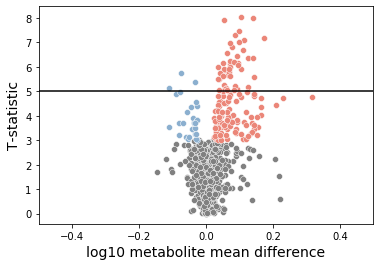

In [47]:
genename = "TP53"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 3]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <-0.025]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0.025]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 3]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")
significant_frame = pd.concat([plotting_frame_sig_low, plotting_frame_sig_high])
index_significant = significant_frame.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

In [48]:
for item in significant_metabolites:
    print(item)

Propyl alcohol
Isopropyl alcohol
Pyruvaldehyde
Malondialdehyde
Aniline
Pyrrole-2-carboxylic acid
3-Furoic acid
2-Furoic acid
1-Pyrroline-5-carboxylic acid
1-Pyrroline-2-carboxylic acid
Fumaric acid
Maleic acid
L-Malic acid
Malic acid
O-Phosphoethanolamine
2-Keto-glutaramic acid
Xanthine
Oxypurinol
6,8-Dihydroxypurine
5-Hydroxymethyl-4-methyluracil
4-Imidazolone-5-propionic acid
Imidazolelactic acid
2-Aminomuconic acid
Oenanthic ether
Pelargonic acid
Indoleacetaldehyde
N-Acetyl-L-glutamate 5-semialdehyde
cis-Aconitic acid
trans-Aconitic acid
Dehydroascorbic acid
N-Acetyl-L-aspartic acid
N-Formyl-L-glutamic acid
Galactitol
Sorbitol
Mannitol
L-Iditol
Epinephrine
Normetanephrine
Methylnoradrenaline
Phosphohydroxypyruvic acid
Glutarylglycine
N-Acetylglutamic acid
Citric acid
Isocitric acid
D-threo-Isocitric acid
Diketogulonic acid
2,3-Diketo-L-gulonate
D-Glucuronic acid
Galacturonic acid
Iduronic acid
Pectic acid
Pectin
3-Dehydro-L-gulonate
5-Keto-D-gluconate
2-Keto-L-gluconate
Ureidosuccin

In [49]:
print(len(index_significant))

178


In [9]:
print(len(significant_metabolites))

769


In [12]:
print(len(plotting_frame_sig_low))

29


In [13]:
print(len(plotting_frame_sig_high))

149


In [14]:
significant_frame

,TP53,T_TP53
5,-0.036045,3.760
10,-0.044747,4.352
59,-0.089961,4.889
94,-0.109240,5.155
105,-0.034463,3.430
...,...,...
1076,0.035146,3.506
1091,0.027522,3.518
1095,0.035948,4.215
1098,0.041048,3.225


In [18]:
TP53_metabolites_diff = differential_array[differential_array.index.isin(index_significant)]
TP53_metabolites_tstat = tstat_array[tstat_array.index.isin(index_significant)]

In [19]:
TP53_metabolites_tstat

,T_A1CF,T_ABI1,T_ABL1,T_ABL2,T_ACSL3,T_ACSL6,T_ACVR1,T_ACVR2A,T_AFF1,T_AFF3,...,T_ZMYM3,T_ZNF331,T_ZNF384,T_ZNF429,T_ZNF479,T_ZNF521,T_ZNRF3,T_ZRSR2,T_STK11.1,T_KEAP1.1
5,1.690,-1.875,-1.367,-0.445,0.498,-3.144,3.060,-1.079,2.092,-0.496,...,0.426,-0.249,-0.382,0.765,0.269,-1.725,0.790,-0.955,0.464,1.899
10,-1.672,-2.591,-0.934,0.016,-2.035,-1.413,2.793,-1.102,0.519,-0.281,...,-0.651,-2.931,-0.885,1.965,0.998,-1.922,-1.851,-2.815,-1.286,-0.455
28,2.174,-0.882,-1.683,0.795,2.885,1.442,-1.053,-0.837,3.059,-0.601,...,-0.760,-0.190,3.167,-1.159,2.334,0.100,-1.558,-0.309,-2.330,-1.662
49,1.408,4.011,-0.601,-1.391,-2.196,6.249,0.332,0.421,-4.905,-3.500,...,-1.125,-0.819,1.115,0.672,-4.975,-3.064,-0.219,-2.923,4.339,-1.780
51,-4.459,-1.309,-0.131,-0.174,-1.959,-0.393,0.897,2.111,-3.720,-0.118,...,-1.697,-0.420,-1.664,-0.037,0.385,-2.529,3.510,0.211,5.486,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,-1.142,0.184,2.602,2.557,-1.361,2.250,-1.194,-2.517,-1.395,-2.192,...,-1.108,0.544,-0.019,7.637,1.534,-1.560,2.856,-4.313,4.299,-0.579
1091,1.799,2.909,1.904,3.394,-0.580,2.923,0.663,-2.105,-1.384,-3.614,...,-2.950,1.307,-2.230,-0.899,4.142,-1.122,-2.281,-1.648,1.594,-0.656
1095,-1.478,-0.983,2.628,-0.130,2.124,3.727,-1.970,-0.691,-2.864,-1.769,...,-1.567,1.667,0.374,4.238,1.901,-2.139,-0.182,-0.500,5.101,-1.182
1098,0.493,-0.783,1.186,1.395,2.422,2.337,-3.228,-2.723,-1.300,-0.236,...,-2.038,2.777,1.432,7.701,-0.390,3.943,2.689,-1.609,1.319,0.862


C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


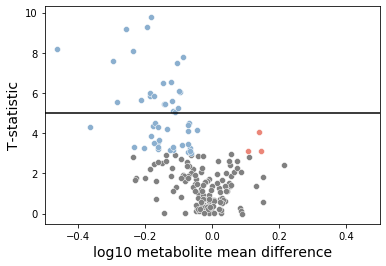

In [20]:
genename = "CDKN1A"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = TP53_metabolites_diff[genename]
yvalues = TP53_metabolites_tstat["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 3]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <-0.025]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0.025]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 3]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")
significant_frame = pd.concat([plotting_frame_sig_low, plotting_frame_sig_high])
index_significant = significant_frame.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

In [23]:
print(len(index_significant))

52


In [24]:
for item in significant_metabolites:
    print(item)

Pyruvaldehyde
Malondialdehyde
3-Furoic acid
2-Furoic acid
Fumaric acid
Maleic acid
L-Malic acid
Malic acid
O-Phosphoethanolamine
Xanthine
Oxypurinol
6,8-Dihydroxypurine
cis-Aconitic acid
trans-Aconitic acid
Dehydroascorbic acid
Glutarylglycine
N-Acetylglutamic acid
Citric acid
Isocitric acid
D-threo-Isocitric acid
Diketogulonic acid
2,3-Diketo-L-gulonate
D-Glucuronic acid
Galacturonic acid
Iduronic acid
Pectic acid
Pectin
3-Dehydro-L-gulonate
5-Keto-D-gluconate
2-Keto-L-gluconate
L-Cystathionine
Allocystathionine
Flavone
Carnosine
(6R)-6-(L-Erythro-1,2-Dihydroxypropyl)-5,6,7,8-tetrahydro-4a-hydroxypterin
Heptanoylcarnitine
Epsilon-(gamma-Glutamyl)-lysine
L-a-glutamyl-L-Lysine
Argininosuccinic acid
Famotidine
Nervonic acid
LPA(0:0/18:1(9Z))
LPA(18:1(9Z)/0:0)
DHAP(18:0)
2-(a-Hydroxyethyl)thiamine diphosphate
Glucosylgalactosyl hydroxylysine
LysoPE(0:0/20:1(11Z))
LysoPE(20:1(11Z)/0:0)
LysoPC(P-18:0)
LysoPC(18:1(9Z))
LysoPC(18:1(11Z))
DG(14:0/18:1(11Z)/0:0)
DG(14:0/18:1(9Z)/0:0)
DG(14:1(9Z

In [25]:
print(len(significant_metabolites))

287


C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


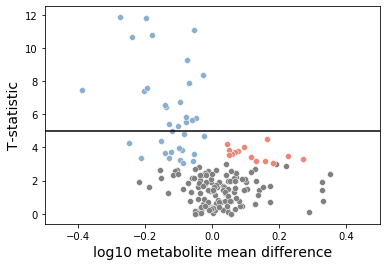

In [26]:
genename = "MDM2"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = TP53_metabolites_diff[genename]
yvalues = TP53_metabolites_tstat["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 3]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <-0.025]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0.025]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 3]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")
significant_frame = pd.concat([plotting_frame_sig_low, plotting_frame_sig_high])
index_significant = significant_frame.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

In [27]:
print(len(index_significant))

49


In [28]:
for item in significant_metabolites:
    print(item)

Pyrrole-2-carboxylic acid
Xanthine
Oxypurinol
6,8-Dihydroxypurine
2-Aminomuconic acid
N-Acetyl-L-glutamate 5-semialdehyde
Phosphohydroxypyruvic acid
5-L-Glutamyl-taurine
Daidzein
Argininosuccinic acid
D-4'-Phosphopantothenate
Beta-Citryl-L-glutamic acid
Famotidine
Nervonic acid
Tetracosanoic acid
Sphingosine 1-phosphate
CPA(16:0/0:0)
CPA(18:0/0:0)
PE(P-16:0e/0:0)
LysoPE(0:0/22:1(13Z))
LysoPE(22:1(13Z)/0:0)
DG(14:0/16:1(9Z)/0:0)
DG(14:1(9Z)/16:0/0:0)
DG(16:0/14:1(9Z)/0:0)
DG(16:1(9Z)/14:0/0:0)
DG(14:0/18:1(11Z)/0:0)
DG(14:0/18:1(9Z)/0:0)
DG(14:1(9Z)/18:0/0:0)
DG(16:0/16:1(9Z)/0:0)
DG(16:1(9Z)/16:0/0:0)
DG(18:0/14:1(9Z)/0:0)
DG(18:1(11Z)/14:0/0:0)
DG(18:1(9Z)/14:0/0:0)
CE(16:1(9Z))
PC(14:1(9Z)/P-16:0)
PE(15:0/P-18:1(11Z))
PE(15:0/P-18:1(9Z))
PC(P-16:0/14:1(9Z))
PE(P-18:1(11Z)/15:0)
PE(P-18:1(9Z)/15:0)
PC(o-16:1(9Z)/14:1(9Z))
PE(18:3(6Z,9Z,12Z)/P-16:0)
PE(18:3(9Z,12Z,15Z)/P-16:0)
PE(P-16:0/18:3(6Z,9Z,12Z))
PE(P-16:0/18:3(9Z,12Z,15Z))
PE(16:1(9Z)/P-18:1(11Z))
PE(16:1(9Z)/P-18:1(9Z))
PE(18:

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


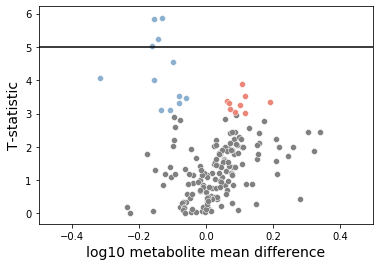

In [29]:
genename = "FAS"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = TP53_metabolites_diff[genename]
yvalues = TP53_metabolites_tstat["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 3]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <-0.025]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0.025]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 3]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")
significant_frame = pd.concat([plotting_frame_sig_low, plotting_frame_sig_high])
index_significant = significant_frame.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

In [30]:
print(len(index_significant))

21


In [31]:
for item in significant_metabolites:
    print(item)

Propyl alcohol
Isopropyl alcohol
O-Phosphoethanolamine
Oenanthic ether
Pelargonic acid
N-Nonanoylglycine
Epsilon-(gamma-Glutamyl)-lysine
L-a-glutamyl-L-Lysine
2-Phenylethanol glucuronide
CPA(16:0/0:0)
11-Hydroxyeicosatetraenoate glyceryl ester
2-(14,15-Epoxyeicosatrienoyl) Glycerol
CPA(18:0/0:0)
LPA(0:0/18:1(9Z))
LPA(18:1(9Z)/0:0)
DHAP(18:0)
Glucosylgalactosyl hydroxylysine
DG(14:1(9Z)/15:0/0:0)
DG(15:0/14:1(9Z)/0:0)
PC(14:0/P-16:0)
PE(15:0/P-18:0)
PC(P-16:0/14:0)
PE(P-18:0/15:0)
PC(o-14:0/16:1(9Z))
PC(o-16:0/14:1(9Z))
PC(15:0/18:2(9Z,12Z))
PC(18:2(9Z,12Z)/15:0)
PE(14:0/22:2(13Z,16Z))
PE(14:1(9Z)/22:1(13Z))
PE(16:0/20:2(11Z,14Z))
PE(16:1(9Z)/20:1(11Z))
PE(18:0/18:2(9Z,12Z))
PE(18:1(11Z)/18:1(11Z))
PE(18:1(11Z)/18:1(9Z))
PE(18:1(9Z)/18:1(11Z))
PE(18:1(9Z)/18:1(9Z))
PE(18:2(9Z,12Z)/18:0)
PE(20:1(11Z)/16:1(9Z))
PE(20:2(11Z,14Z)/16:0)
PE(22:1(13Z)/14:1(9Z))
PE(22:2(13Z,16Z)/14:0)
PE(22:4(7Z,10Z,13Z,16Z)/P-18:1(11Z))
PE(22:4(7Z,10Z,13Z,16Z)/P-18:1(9Z))
PE(22:5(4Z,7Z,10Z,13Z,16Z)/dm18:0)
PE(

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


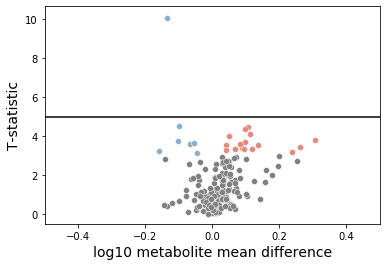

In [32]:
genename = "XPC"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = TP53_metabolites_diff[genename]
yvalues = TP53_metabolites_tstat["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 3]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <-0.025]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0.025]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 3]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")
significant_frame = pd.concat([plotting_frame_sig_low, plotting_frame_sig_high])
index_significant = significant_frame.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

In [33]:
print(len(index_significant))

23


In [34]:
for item in significant_metabolites:
    print(item)

Aniline
Pyrrole-2-carboxylic acid
1-Pyrroline-5-carboxylic acid
1-Pyrroline-2-carboxylic acid
2-Aminomuconic acid
N-Acetyl-L-glutamate 5-semialdehyde
N-Acetyl-L-aspartic acid
N-Formyl-L-glutamic acid
Phosphohydroxypyruvic acid
Argininosuccinic acid
2-Phenylethanol glucuronide
Beta-Citryl-L-glutamic acid
Hesperetin
Sphingosine 1-phosphate
CPA(18:1(11Z)/0:0)
CPA(18:1(9Z)/0:0)
Alpha-Tocopherol
DG(14:1(9Z)/15:0/0:0)
DG(15:0/14:1(9Z)/0:0)
PG(16:1(9Z)/20:4(5Z,8Z,11Z,14Z))
PG(18:2(9Z,12Z)/18:3(6Z,9Z,12Z))
PG(18:2(9Z,12Z)/18:3(9Z,12Z,15Z))
PG(18:3(6Z,9Z,12Z)/18:2(9Z,12Z))
PG(18:3(9Z,12Z,15Z)/18:2(9Z,12Z))
PG(16:0/22:5(4Z,7Z,10Z,13Z,16Z))
PG(16:0/22:5(7Z,10Z,13Z,16Z,19Z))
PG(16:1(9Z)/22:4(7Z,10Z,13Z,16Z))
PG(18:1(11Z)/20:4(5Z,8Z,11Z,14Z))
PG(18:1(9Z)/20:4(5Z,8Z,11Z,14Z))
PG(18:2(9Z,12Z)/20:3(5Z,8Z,11Z))
PG(18:2(9Z,12Z)/20:3(8Z,11Z,14Z))
PG(16:0/22:4(7Z,10Z,13Z,16Z))
PG(18:0/20:4(5Z,8Z,11Z,14Z))
PG(18:1(11Z)/20:3(5Z,8Z,11Z))
PG(18:1(11Z)/20:3(8Z,11Z,14Z))
PG(18:1(9Z)/20:3(5Z,8Z,11Z))
PG(18:1(9Z)

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


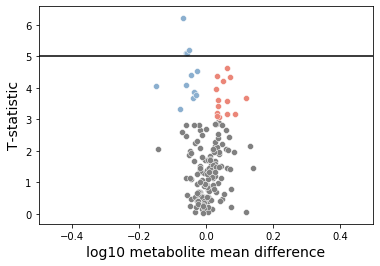

In [35]:
genename = "TSC2"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = TP53_metabolites_diff[genename]
yvalues = TP53_metabolites_tstat["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 3]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <-0.025]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0.025]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 3]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")
significant_frame = pd.concat([plotting_frame_sig_low, plotting_frame_sig_high])
index_significant = significant_frame.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

In [36]:
print(len(index_significant))

27


In [37]:
for item in significant_metabolites:
    print(item)

Xanthine
Oxypurinol
6,8-Dihydroxypurine
Oenanthic ether
Pelargonic acid
N-Nonanoylglycine
L-Cystathionine
Allocystathionine
Flavone
5-L-Glutamyl-taurine
Daidzein
Mannitol 1-phosphate
Sorbitol-6-phosphate
L-beta-aspartyl-L-glutamic acid
Epsilon-(gamma-Glutamyl)-lysine
L-a-glutamyl-L-Lysine
2-Phenylethanol glucuronide
Hesperetin
Tetracosatetraenoic acid (24:4n-6)
Nervonic acid
CPA(16:0/0:0)
LPA(0:0/18:1(9Z))
LPA(18:1(9Z)/0:0)
DHAP(18:0)
PE(P-16:0e/0:0)
O-6-deoxy-a-L-galactopyranosyl-(1->2)-O-b-D-galactopyranosyl-(1->3)-2-(acetylamino)-1,5-anhydro-2-deoxy-D-arabino-Hex-1-enitol
O-6-deoxy-a-L-galactopyranosyl-(1->2)-O-b-D-galactopyranosyl-(1->4)-2-(acetylamino)-1,5-anhydro-2-deoxy-D-arabino-Hex-1-enitol
cis-5,6-Dihydro-5,6-dihydroxy-carotene
CE(16:1(9Z))
DG(18:0/22:4(7Z,10Z,13Z,16Z)/0:0)
DG(18:1(11Z)/20:3(5Z,8Z,11Z)/0:0)
DG(18:2(9Z,12Z)/22:2(13Z,16Z)/0:0)
DG(18:3(6Z,9Z,12Z)/22:1(13Z)/0:0)
DG(18:3(9Z,12Z,15Z)/22:1(13Z)/0:0)
DG(18:4(6Z,9Z,12Z,15Z)/22:0/0:0)
DG(20:0/20:4(5Z,8Z,11Z,14Z)/0:0)
D

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


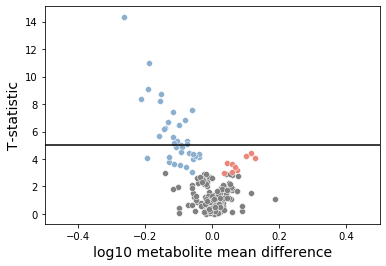

In [38]:
genename = "TSC1"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = TP53_metabolites_diff[genename]
yvalues = TP53_metabolites_tstat["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 3]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <-0.025]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0.025]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 3]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")
significant_frame = pd.concat([plotting_frame_sig_low, plotting_frame_sig_high])
index_significant = significant_frame.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

In [39]:
print(len(index_significant))

46


In [40]:
for item in significant_metabolites:
    print(item)

3-Furoic acid
2-Furoic acid
O-Phosphoethanolamine
2-Keto-glutaramic acid
2-Aminomuconic acid
cis-Aconitic acid
trans-Aconitic acid
Dehydroascorbic acid
N-Acetyl-L-aspartic acid
N-Formyl-L-glutamic acid
Citric acid
Isocitric acid
D-threo-Isocitric acid
Diketogulonic acid
2,3-Diketo-L-gulonate
Palmitaldehyde
Argininosuccinic acid
2-Phenylethanol glucuronide
MG(18:0e/0:0/0:0)
PE(P-16:0e/0:0)
2-(a-Hydroxyethyl)thiamine diphosphate
Glucosylgalactosyl hydroxylysine
DG(14:0/16:1(9Z)/0:0)
DG(14:1(9Z)/16:0/0:0)
DG(16:0/14:1(9Z)/0:0)
DG(16:1(9Z)/14:0/0:0)
DG(14:0/18:1(11Z)/0:0)
DG(14:0/18:1(9Z)/0:0)
DG(14:1(9Z)/18:0/0:0)
DG(16:0/16:1(9Z)/0:0)
DG(16:1(9Z)/16:0/0:0)
DG(18:0/14:1(9Z)/0:0)
DG(18:1(11Z)/14:0/0:0)
DG(18:1(9Z)/14:0/0:0)
DG(14:0/18:0/0:0)
DG(16:0/16:0/0:0)
DG(18:0/14:0/0:0)
DG(14:0/20:2(11Z,14Z)/0:0)
DG(14:1(9Z)/20:1(11Z)/0:0)
DG(16:0/18:2(9Z,12Z)/0:0)
DG(16:1(9Z)/18:1(11Z)/0:0)
DG(16:1(9Z)/18:1(9Z)/0:0)
DG(18:1(11Z)/16:1(9Z)/0:0)
DG(18:1(9Z)/16:1(9Z)/0:0)
DG(18:2(9Z,12Z)/16:0/0:0)
DG(2